# Histology Tissue Classification Project (HTCP)




(C) [K. Mader](https://www.linkedin.com/in/kevinmader/?originalSubdomain=ch) / [U. Michelucci 2018-2019](https://www.linkedin.com/in/umbertomichelucci/?originalSubdomain=ch)

*Teaching Assistant:* [Khaled Mohamad](https://www.linkedin.com/in/khaled-mohamad-45071a24b/), E-mail: mohamad.khaled@stud.hslu.ch



# Overview

The dataset serves as a much more interesting MNIST or CIFAR10 problem for biologists by focusing on histology tiles from patients with colorectal cancer. In particular, the data has 8 different classes of tissue (but Cancer/Not Cancer can also be an interesting problem).

The dataset has been adapted for the course by K. Mader (kevin.mader@gmail.com), and is available on kaggle: https://goo.gl/26zj41

# Challenge

* Classify tiles correctly into one of the eight classes
* Which classes are most frequently confused?
* What features can be used (like texture, see scikit-image) to improve classification?
* How can these models be applied to the much larger 5000x5000 models? How can this be done efficiently

# Acknowledgements


The dataset has been copied from Zenodo: https://zenodo.org/record/53169#.W6HwwP4zbOQ

made by: Kather, Jakob Nikolas; Zöllner, Frank Gerrit; Bianconi, Francesco; Melchers, Susanne M; Schad, Lothar R; Gaiser, Timo; Marx, Alexander; Weis, Cleo-Aron

The copy here is to make it more accessible to Kaggle users and allow kernels providing basic analysis of the data

Content This data set represents a collection of textures in histological images of human colorectal cancer. It contains two files:

>     Kather_texture_2016_image_tiles_5000.zip": a zipped folder containing 5000 
>     histological images of 150 * 150 px each (74 * 74 µm). Each image belongs 
>     to exactly one of eight tissue categories (specified by the folder name). 

>     Kather_texture_2016_larger_images_10.zip": a zipped folder containing 10 
>     larger histological images of 5000 x 5000 px each. These images contain 
>     more than one tissue type. Image format


All images are RGB, 0.495 µm per pixel, digitized with an Aperio ScanScope 
(Aperio/Leica biosystems), magnification 20x. Histological samples are fully 
anonymized images of formalin-fixed paraffin-embedded human colorectal 
adenocarcinomas (primary tumors) from our pathology archive (Institute of Pathology, 
University Medical Center Mannheim, Heidelberg University, Mannheim, Germany).

Additionally the files has been prepared to resemble the MNIST dataset, meaning that you will also find the following files

- HTCP_8_8_L - 
- HTCP_8_8_RGB -
- HTCP_28_28_L -
- HTCP_28_28_RGB - 
- HTCP_64_64_L

# Ethics statement
All experiments were approved by the institutional ethics board (medical ethics board II, University Medical Center Mannheim, Heidelberg University, Germany; approval 2015-868R-MA). The institutional ethics board waived the need for informed consent for this retrospective analysis of anonymized samples. All experiments were carried out in accordance with the approved guidelines and with the Declaration of Helsinki.

# More information / data usage
For more information, please refer to the following article. Please cite this article when using the data set.

Kather JN, Weis CA, Bianconi F, Melchers SM, Schad LR, Gaiser T, Marx A, Zollner F: Multi-class texture analysis in colorectal cancer histology (2016), Scientific Reports (in press)

# Contact
For questions, please contact: Dr. Jakob Nikolas Kather http://orcid.org/0000-0002-3730-5348 ResearcherID: D-4279-2015


# Download the data

The dataset is composed of two datasets:

- The small images that will be used to test the classification models
- The big microscope images (5000x5000)

The first dataset is quite small and can be found in the same github repository where you find this file. The second are much bigger (250 Mb and 700 Mb) and cannot be uploaded on github, so you can get them on kaggle: https://goo.gl/hkRSke

# Ideas for the project

The project can be tackled in several ways and at several levels. Here are some ideas for you to tackle at different difficulty levels.

A few general hints:

- Accuracy is a nice metric, but in this case the confusion matrix is more useful. Check which metric is the most ideal for this problem (you could use others)
- If detecting TUMOR proces too hard, try to detect other tissue types. For example ADIPOSE. Some are much easier to detect than others. 
- __REMEMBER__: detecting __ONE__ type of tissue does not necessarly mean being able to detec __ALL__ type of tissues well ;-)
- __REMEMBER__: getting a high accuracy is __NOT__ the goal of the project. The goal is to put you in a real-life situation where you have to be creative to solve a relevant problem. Is not easy and there are not easy ways of solving it.

__OVER ALL REMEMBER: HAVE FUN!__

## Easy

- Use the gray level 28x28 images and consider only two classes: TUMOR and (for example) ADIPOSE. Build with a classifier with a neural network of your choice (probably one neuron would be enough). Similary to what we have done in the class with the digits 1 and 2 from the MNIST dataset.
- Try to build a classifier using the distribution of gray levels in each class. You should take all the images of a specific class and plot the gray level distributions to see if you can use it.
- Try to build a classifier using the distribution of each color channel levels in each class. You should take all the images of a specific class and plot the color channel level distributions to see if you can use it.
- Build a model that gives as output not only the predicted classes, but all 8 with the probability each has sorted from the highest probability to the lowest.




##__STARTING WITH__:
## 1. Easy!

# Helper Functions (Python)

In [1]:
# A function for plotting images

def plot_image(some_image):
    
    some_digit_image = some_image.values.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    

In [2]:
# A function to get Label names(are eight)

def get_label_name(idx):
    
    if (idx == 1):
        return '(1) TUMOR'
    elif (idx == 2):
        return '(2) STROMA'
    elif (idx == 3):
        return '(3) COMPLEX'
    elif (idx == 4):
        return '(4) LYMPHO'
    elif (idx == 5):
        return '(5) DEBRIS'
    elif (idx == 6):
        return '(6) MUCOSA'
    elif (idx == 7):
        return '(7) ADIPOSE'
    elif (idx == 8):
        return '(8) EMPTY'

# Load & Importing Libraries

In [3]:
# Load python libraries

%matplotlib inline
from glob import glob
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from random import randint

# Read images from files and plot
from skimage.io import imread 
import seaborn as sns

# Tensorflow & Keras is imported for building and training models
import tensorflow as tf

# Keras 
from tensorflow.keras.models import Sequential # for building the  layers
from tensorflow.keras.optimizers import SGD    # Optimizer 
from tensorflow.keras.layers import Dense      # Connected network

from tensorflow.keras import layers
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, accuracy_score   # Measure performance of your classifier and accuracy
import time

# Checking your TensorFlow Version 

In [6]:
# Checking out your TensorFlow version
ver_1= '2.10.0'

def tf_version(tf):
  tf_v = tf.__version__
  if tf_v >= ver_1:
    print(f" Your veriosn of TensorFlow is:{tf_v}. Requirement satisfied!")
  else:
    print("Your new version of TensroFlow updating ....")
    !pip3 install --upgrade tensorflow

tf_version(tf)


 Your veriosn of TensorFlow is:2.7.0. Requirement satisfied!


# Load the Data

In [7]:
base_dir = '../data/kather_texture_2016_image_tiles_5000'
df = pd.DataFrame({'path': glob(os.path.join(base_dir, '*', '*.tif'))})
df['file_id'] = df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
df['cell_type'] = df['path'].map(lambda x: os.path.basename(os.path.dirname(x))) 
df['cell_type_idx'] = df['cell_type'].map(lambda x: int(x.split('_')[0]))
df['cell_type'] = df['cell_type'].map(lambda x: x.split('_')[1])
df['full_image_name'] = df['file_id'].map(lambda x: x.split('_Row')[0])
df['full_image_row'] = df['file_id'].map(lambda x: int(x.split('_')[-3]))
df['full_image_col'] = df['file_id'].map(lambda x: int(x.split('_')[-1]))
df['image'] = df['path'].map(imread)

In [11]:
# Know Image Dimensions
def know_image_dim(in_shape):

    side_len = int(np.sqrt(in_shape))
    abs_value = np.abs(in_shape-side_len*side_len)<2
    negative_value = side_len = int(np.sqrt(in_shape/3))

    if abs_value:
        return (int(side_len), int(side_len))
    else:
        negative_value
        return (side_len, side_len, 3)
        
csv_dir = os.path.join('.', '../data/')
print(f"My current working directory is: {csv_dir} ")

My current working directory is: ./../data/ 


In [12]:
# Return all file names from current directory and sort in ascending orders(shaps)
all_files = sorted(glob(os.path.join(csv_dir, 'HTCP*.csv')), 
                   key=lambda x: os.stat(x).st_size)

all_df_dict = {os.path.splitext(os.path.basename(x))[0]: pd.read_csv(x) for x in all_files}
print("VECTOR SIZE FOR EVERY DATASET:\n")
for c_key in all_df_dict.keys():
    print(c_key, 'vector length:',  
          all_df_dict[c_key].shape[1], '->', 
            know_image_dim(all_df_dict[c_key].shape[1]))

VECTOR SIZE FOR EVERY DATASET:

HTCP_8_8_L vector length: 65 -> (4, 4)
HTCP_8_8_RGB vector length: 193 -> (8, 8, 3)
HTCP_28_28_L vector length: 785 -> (16, 16)
HTCP_28_28_RGB vector length: 2353 -> (28, 28, 3)
HTCP_64_64_L vector length: 4097 -> (36, 36)


In [13]:
# Print directory names and filenames as a list []
all_files

['./../data/HTCP_8_8_L.csv',
 './../data/HTCP_8_8_RGB.csv',
 './../data/HTCP_28_28_L.csv',
 './../data/HTCP_28_28_RGB.csv',
 './../data/HTCP_64_64_L.csv']

In [14]:
# Read csv file from list(all_files)
data = pd.read_csv(all_files[2])

Let's create an array with labels (not yet one-encoded) and one for the images.

In [15]:
# Get the labels from the data
labels = data['label']
data = data.drop(['label'], axis = 1)

Let's look at the first records of the dataframe

In [16]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,101,110,154,160,95,44,139,184,164,160,...,128,103,73,72,75,152,130,96,133,159
1,67,66,69,76,80,57,46,67,90,77,...,57,58,65,74,80,81,83,77,75,73
2,127,137,121,140,170,111,128,117,60,105,...,69,90,100,143,119,148,140,193,146,97
3,80,90,101,106,120,100,99,66,63,91,...,154,131,109,97,102,71,93,120,84,62
4,153,141,121,132,110,131,119,99,101,91,...,134,117,121,136,178,192,210,189,149,155


The datasets has 5000 images, each 28x28 in gray

In [17]:
# Shape after dorping the lable 
data.shape

(5000, 784)

# Examples of each class

Let's plot an image of each class

In [18]:
# Unique lables
def unique_lables(lable):
  uniq = lable.unique()
  return f"{uniq}, dtype=int64"
unique_lables(labels)

'[2 5 7 6 8 1 4 3], dtype=int64'

In [19]:
# Note: A function to get Label names defined above
# Get all 8 Labels with random data
def get_random_element_with_label (data, lbls, lbl):
    tmp = lbls == lbl
    subset = data[tmp]
    return subset.iloc[randint(1,subset.shape[0])]

labels_overview = np.empty([10,784])
for i in range (1,9):
    img = get_random_element_with_label(data, labels, i)
    labels_overview[i,:] = img
 

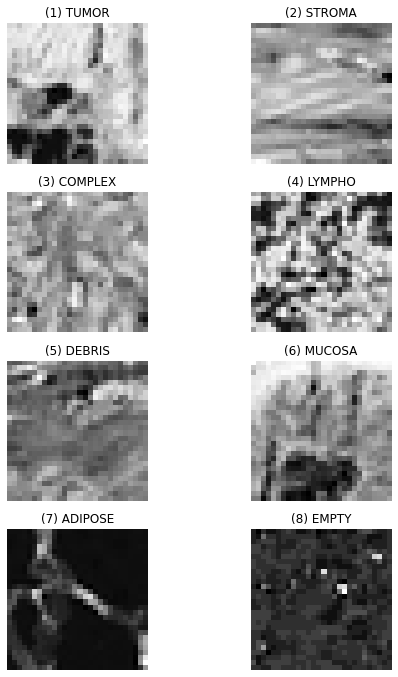

In [20]:
f = plt.figure(figsize=(8,15));
count = 1
for i in range(1,9):
    plt.subplot(5,2,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.2)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[i,:].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")

# Work with the original images

Let's first load the images and their information (metadata)

In [23]:
# Join Data and Kather_texture_2016_image_tiles_5000 as a Dataframe

base_tile_dir = os.path.join('', '../data/Kather_texture_2016_image_tiles_5000')
print(base_tile_dir)

tile_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir, '*', '*.tif'))
})

tile_df['file_id'] = tile_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
tile_df['cell_type'] = tile_df['path'].map(lambda x: os.path.basename(os.path.dirname(x))) 
tile_df['cell_type_idx'] = tile_df['cell_type'].map(lambda x: int(x.split('_')[0]))
tile_df['cell_type'] = tile_df['cell_type'].map(lambda x: x.split('_')[1])
tile_df['full_image_name'] = tile_df['file_id'].map(lambda x: x.split('_Row')[0])
tile_df['full_image_row'] = tile_df['file_id'].map(lambda x: int(x.split('_')[-3]))
tile_df['full_image_col'] = tile_df['file_id'].map(lambda x: int(x.split('_')[-1]))
tile_df.sample(3)

../data/Kather_texture_2016_image_tiles_5000


,path,file_id,cell_type,cell_type_idx,full_image_name,full_image_row,full_image_col
3142,../data/Kather_texture_2016_image_tiles_5000/0...,139B6_CRC-Prim-HE-06_005.tif_Row_3151_Col_2851,EMPTY,8,139B6_CRC-Prim-HE-06_005.tif,3151,2851
2670,../data/Kather_texture_2016_image_tiles_5000/0...,1D7_CRC-Prim-HE-01_036.tif_Row_151_Col_151,COMPLEX,3,1D7_CRC-Prim-HE-01_036.tif,151,151
932,../data/Kather_texture_2016_image_tiles_5000/0...,16D59_CRC-Prim-HE-08_022.tif_Row_451_Col_751,MUCOSA,6,16D59_CRC-Prim-HE-08_022.tif,451,751


In [24]:
tile_df.describe(exclude=[np.number])

,path,file_id,cell_type,full_image_name
count,5000,5000,5000,5000
unique,5000,5000,8,4995
top,../data/Kather_texture_2016_image_tiles_5000/0...,14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151,STROMA,15EA0_CRC-Prim-HE-01_013.tif
freq,1,1,625,2


<AxesSubplot:>

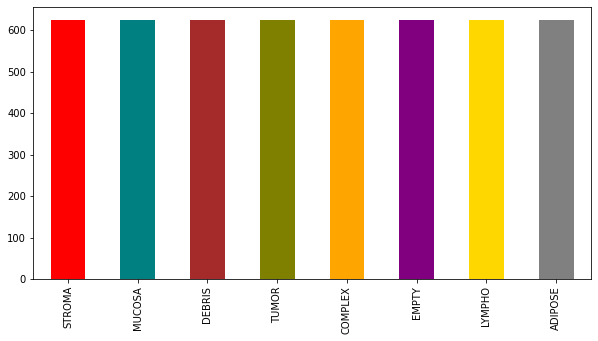

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
c = ['red', 'teal', 'brown', 'olive', 'orange', 'purple', 'gold','gray']
tile_df['cell_type'].value_counts().plot(kind='bar', color= c, ax=ax1)


In [26]:
# load in all of the images
from skimage.io import imread
tile_df['image'] = tile_df['path'].map(imread)

In [27]:
tile_df['path'].iloc[0]

'../data/Kather_texture_2016_image_tiles_5000/02_STROMA/14389_CRC-Prim-HE-07_026.tif_Row_751_Col_151.tif'

# Show a few in each category

__NOTE__: the images are here 150x150, so slightly bigger than the gray level ones, that are 28x28.

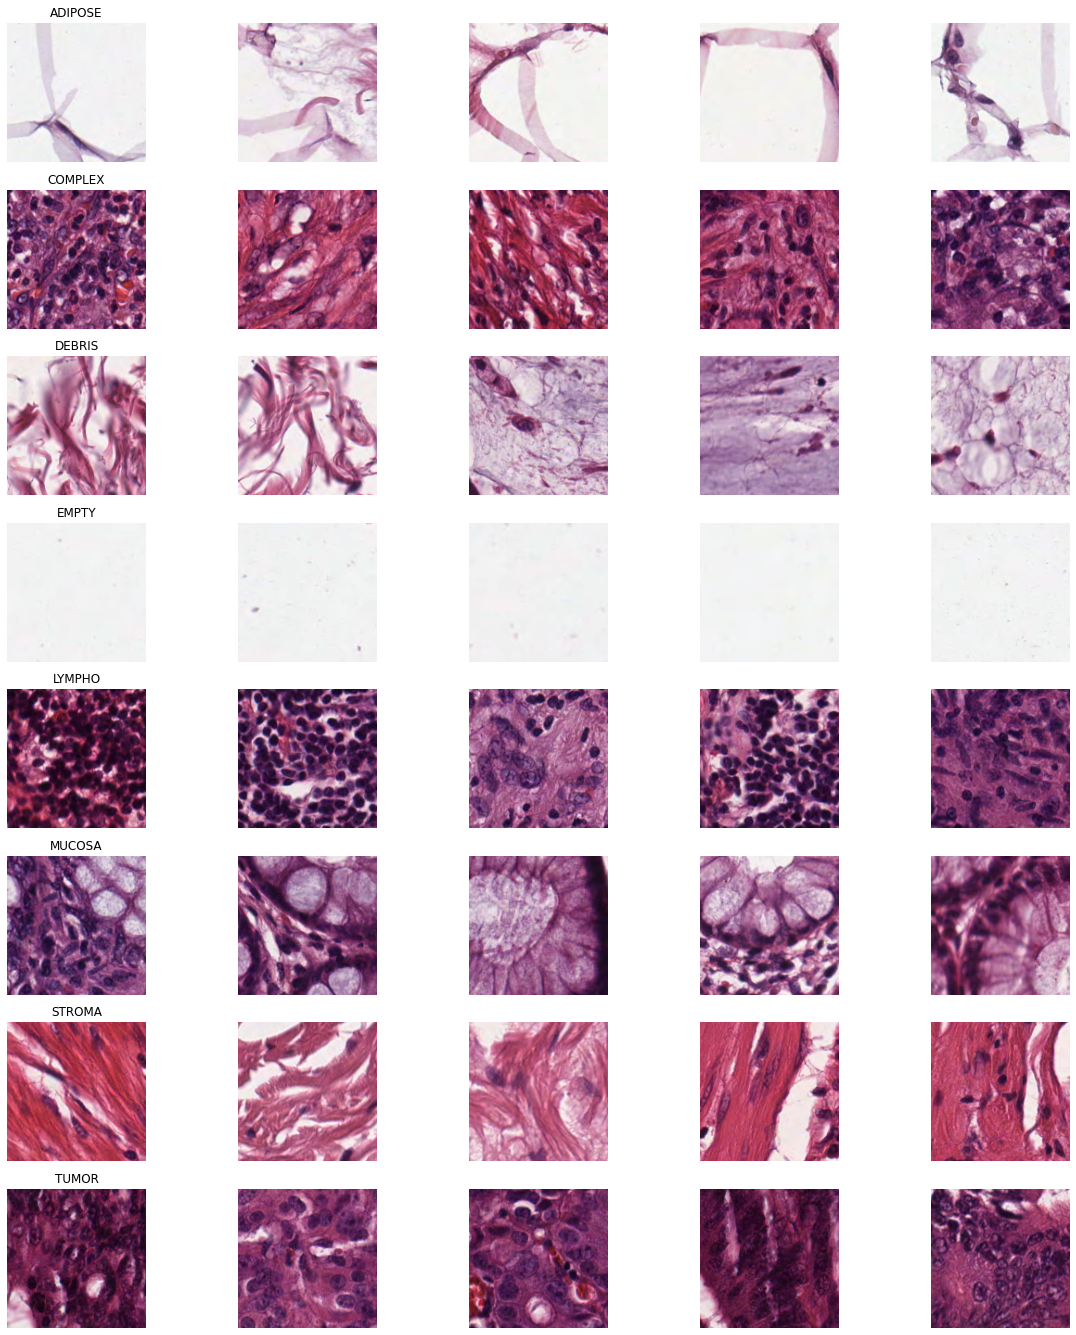

In [ ]:
n_samples = 5
fig, m_axs = plt.subplots(8, n_samples, figsize = (4*n_samples, 3*8))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         tile_df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

# Load the 5000x5000 images

__NOTE__: keep in mind that each image is roughly 70 Mb, so if you want to try to identify the location of each type of tissue you can try loading one at a time.

In [ ]:
base_tile_dir = os.path.join('', '../data/Kather_texture_2016_larger_images_10')

big_image_df = pd.DataFrame({
    'path': glob(os.path.join(base_tile_dir,  '*.tif'))
})

print(big_image_df.iloc[0])

In [ ]:
big_image_df['image'] = big_image_df['path'].map(plt.imread)

In [ ]:
big_image_df.head()

,path,image
0,/content/Kather_texture_2016_larger_images_10/...,"[[[186, 90, 135], [187, 91, 136], [181, 90, 14..."
1,/content/Kather_texture_2016_larger_images_10/...,"[[[147, 110, 154], [150, 118, 167], [143, 111,..."
2,/content/Kather_texture_2016_larger_images_10/...,"[[[176, 144, 181], [225, 199, 200], [249, 223,..."
3,/content/Kather_texture_2016_larger_images_10/...,"[[[79, 20, 52], [62, 13, 42], [63, 14, 43], [6..."
4,/content/Kather_texture_2016_larger_images_10/...,"[[[168, 69, 110], [165, 66, 107], [167, 63, 98..."


the ```big_image_df``` has 10 images.

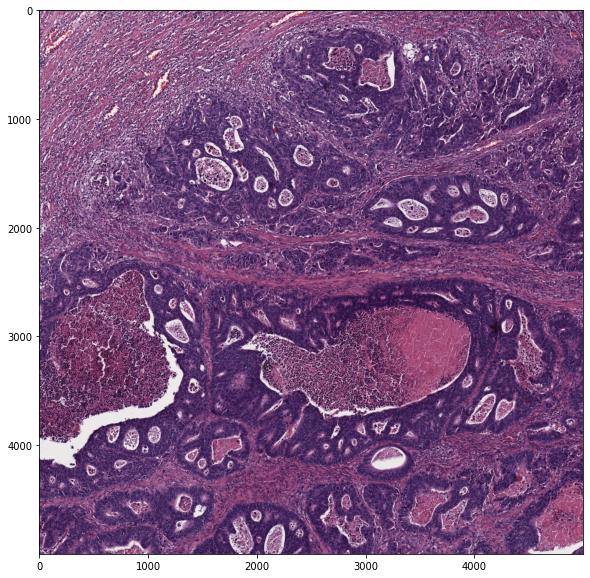

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(big_image_df['image'].iloc[1])
plt.show()

# Baseline models with 28x28 gray images

In [30]:
from sklearn.model_selection import train_test_split
sample_id_count = list(all_df_dict.values())[0].shape[0]
train_ids, test_ids = train_test_split(range(sample_id_count), 
                                       test_size=0.25, 
                                       random_state=2018)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

def evaluate_models(in_model_maker):
    fig, m_axs = plt.subplots(1, 5, figsize = (25, 5))
    for c_ax, c_key in zip(m_axs, all_df_dict.keys()):
        # c_key is for example HTCP_8_8_L (the file/type name)
        c_df = all_df_dict[c_key].copy()
        c_label = c_df.pop('label') # return column and drop from dataframe
        c_model = in_model_maker() # function of the model
        c_model.fit(c_df.iloc[train_ids, :], c_label.iloc[train_ids]) # fit of the model
        c_pred = c_model.predict(c_df.iloc[test_ids, :]) # prediction
        sns.heatmap(confusion_matrix(c_label.iloc[test_ids], c_pred), 
                    annot=True, cbar=False, fmt='d', ax=c_ax)
        c_ax.set_title(f'Accuracy: {accuracy_score(c_label[test_ids],c_pred)*100:2.2f}%\n{c_key}')


# Classifier: Neireast neighbor

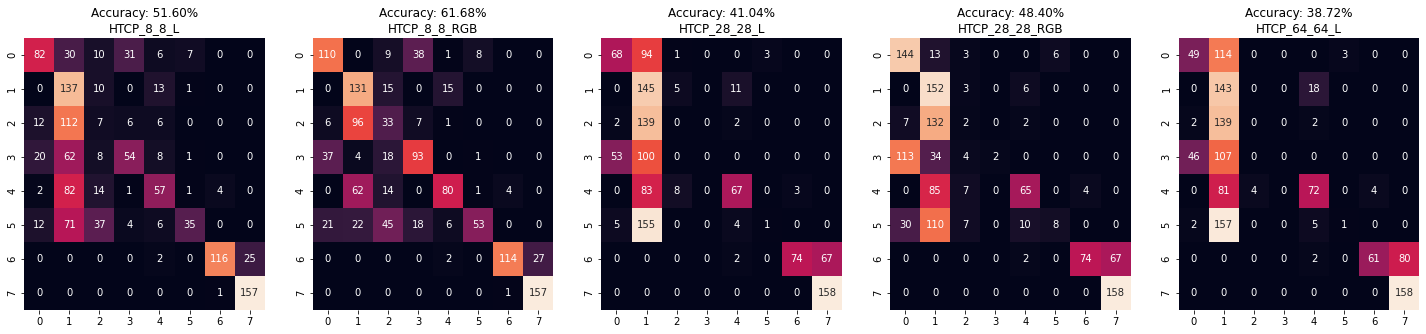

In [32]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_models(lambda : KNeighborsClassifier(n_jobs=4))

# Classifier: Logistic regression



--------------------------------------------------------------------------------
LokyProcess-5 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/umberto/Python-Environments/tf25/lib/python3.7/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 197, in <module>
    prep_data = pickle.load(from_parent)
ValueError: unsupported pickle protocol: 5


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
LokyProcess-6 failed with traceback: 
--------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/umberto/Python-Environments/tf25/lib/python3.7/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 197, in <module>
    prep_data = pickle.load(from_parent)
ValueError: unsupp

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1)}

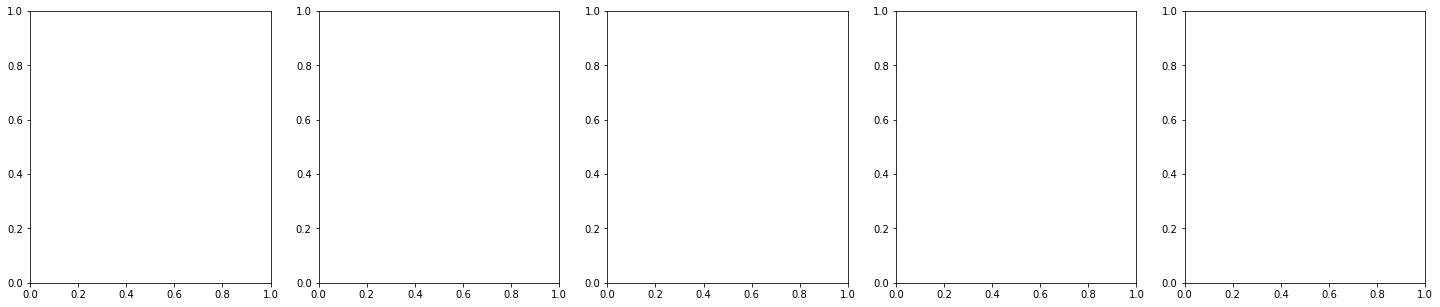

In [34]:
from sklearn.linear_model import LogisticRegression
evaluate_models(lambda : LogisticRegression(n_jobs=4, solver='lbfgs'))

# Classifier: Random Forest 

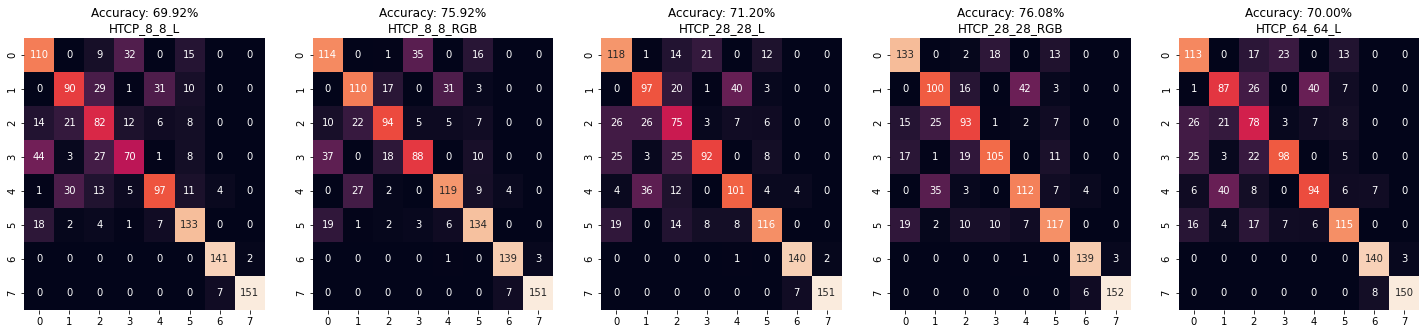

In [35]:
from sklearn.ensemble import RandomForestClassifier
evaluate_models(lambda : RandomForestClassifier(n_jobs=4))

###Compared to Logistic Regression and K-Nearest Neighbors, Random Forest performance (Accuracy) is the best!